# Machine Learning - Assignment 6

## Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset.  
## Determine the number of clusters using the elbow method.

In [10]:
# Importing libraries like pandas, numpy, matplotlib, and seaborn.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Read data from csv file using read_csv() and print its first 5 entries
data = pd.read_csv("C:\\Users\\HP\\Downloads\\sales_data_sample.csv", encoding='Latin-1')
data.head()

# While utf-8 supports all languages according to pandas' documentation, utf-8 has a byte structure that must be respected at all times. Some of the values not included in utf-8 are latin small letters i with diaeresis, right-pointing double angle quotation mark, inverted question mark. This are mapped as 0xef, 0xbb and 0xbf bytes respectively. Hence your error.

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
# Check for number of rows and columns using shape method
data.shape

(2823, 25)

In [13]:
# Number of NAN values per column in the dataset
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [14]:
# Drop columns from dataset which are no longer required for the problem statement
data.drop(["ORDERNUMBER", "PRICEEACH", "ORDERDATE", "PHONE", "ADDRESSLINE1", "ADDRESSLINE2", "CITY", "STATE", "TERRITORY", "POSTALCODE", "CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis = 1, inplace=True)

In [15]:
# View first 5 entries of data after dropping columns
data.head()

,QUANTITYORDERED,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
0,30,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,USA,Small
1,34,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,France,Small
2,41,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,France,Medium
3,45,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,USA,Medium
4,49,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,USA,Medium


In [16]:
# Number of NAN values per column in the dataset
data.isnull().sum()

QUANTITYORDERED    0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
dtype: int64

# Exploratary Data Analysis

In [17]:
# Generate descriptive analysis of the data
data.describe()

,QUANTITYORDERED,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,9.741443,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,6.000000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,97.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


<AxesSubplot:xlabel='STATUS', ylabel='count'>

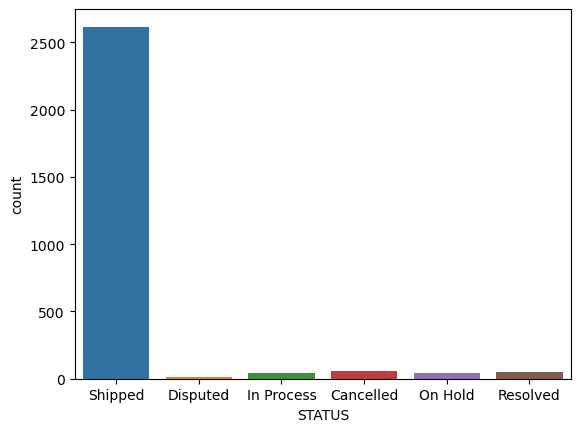

In [18]:
# Count number of data in each category of STATUS column using countplot() in seaborn library
sns.countplot(data = data , x = 'STATUS')

In [19]:
import seaborn as sns

Here, we can see all the category lies in the range of price. Thus, we are creating a cluster targeting the same.




In [20]:
# Convert unique values from PRODUCTLINE column into an array
data['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [21]:
# Checking the duplicated values 
data.drop_duplicates(inplace=True)

In [22]:
# Check datatype for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   ORDERLINENUMBER  2823 non-null   int64  
 2   SALES            2823 non-null   float64
 3   STATUS           2823 non-null   object 
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  CUSTOMERNAME     2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 308.8+ KB


In [23]:
# Concatenate object datatype values into a list
list_cat = data.select_dtypes(include=['object']).columns.tolist()

In [24]:
# Display list 
list_cat

['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'COUNTRY', 'DEALSIZE']

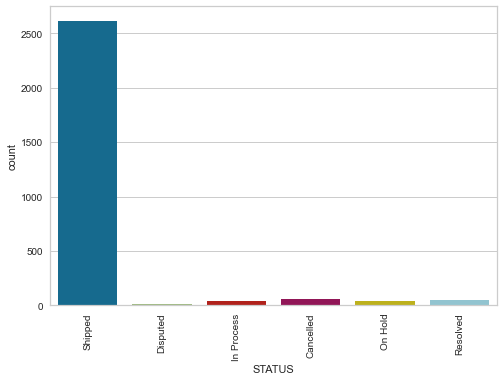

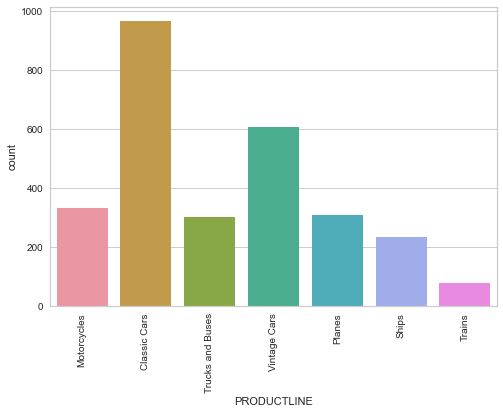

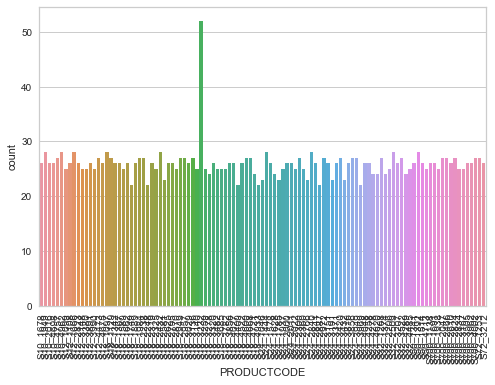

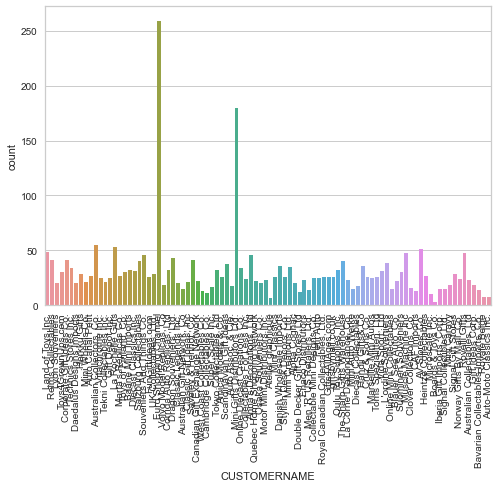

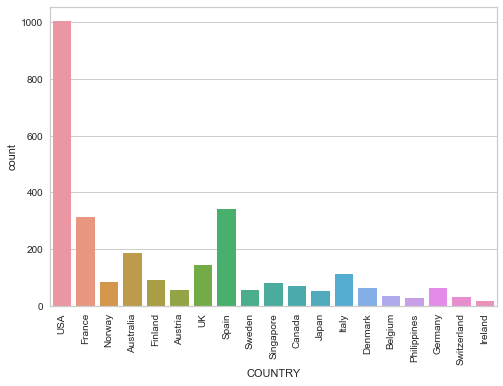

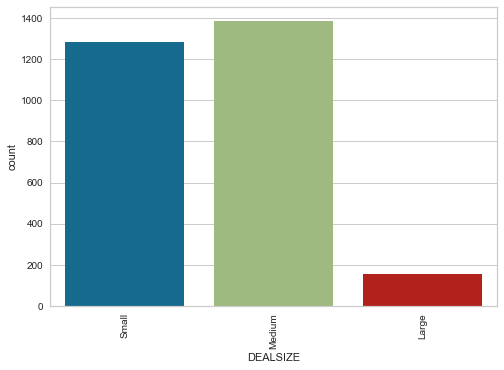

In [110]:
# Visualize into countplot for each column in list
for i in list_cat:
  sns.countplot(data = data ,x = i)
  plt.xticks(rotation = 90)
  plt.show()

In [111]:
# Dealing with the categorical features 
# Conversion of other datatypes into numerical form using LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for i in list_cat:
  data[i]= le.fit_transform(data[i])

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   ORDERLINENUMBER  2823 non-null   int64  
 2   SALES            2823 non-null   float64
 3   STATUS           2823 non-null   int32  
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   int32  
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   int32  
 10  CUSTOMERNAME     2823 non-null   int32  
 11  COUNTRY          2823 non-null   int32  
 12  DEALSIZE         2823 non-null   int32  
dtypes: float64(1), int32(6), int64(6)
memory usage: 307.1 KB


In [113]:
# Converting float datatype of SALES column into int
data['SALES'] = data['SALES'].astype(int)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   QUANTITYORDERED  2823 non-null   int64
 1   ORDERLINENUMBER  2823 non-null   int64
 2   SALES            2823 non-null   int32
 3   STATUS           2823 non-null   int32
 4   QTR_ID           2823 non-null   int64
 5   MONTH_ID         2823 non-null   int64
 6   YEAR_ID          2823 non-null   int64
 7   PRODUCTLINE      2823 non-null   int32
 8   MSRP             2823 non-null   int64
 9   PRODUCTCODE      2823 non-null   int32
 10  CUSTOMERNAME     2823 non-null   int32
 11  COUNTRY          2823 non-null   int32
 12  DEALSIZE         2823 non-null   int32
dtypes: int32(7), int64(6)
memory usage: 296.1 KB


In [115]:
data.describe()

,QUANTITYORDERED,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,6.466171,3553.421537,4.782501,2.717676,7.092455,2003.81509,2.515055,100.715551,53.773291,46.212186,12.029401,1.398512
std,9.741443,4.225841,1841.865754,0.879416,1.203878,3.656633,0.69967,2.411665,40.187912,31.585298,24.936147,6.169774,0.592498
min,6.000000,1.000000,482.000000,0.000000,1.000000,1.000000,2003.00000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,3.000000,2203.000000,5.000000,2.000000,4.000000,2003.00000,0.000000,68.000000,27.000000,29.000000,6.000000,1.000000
50%,35.000000,6.000000,3184.000000,5.000000,3.000000,8.000000,2004.00000,2.000000,99.000000,53.000000,45.000000,14.000000,1.000000
75%,43.000000,9.000000,4508.000000,5.000000,4.000000,11.000000,2004.00000,5.000000,124.000000,81.000000,67.000000,18.000000,2.000000
max,97.000000,18.000000,14082.000000,5.000000,4.000000,12.000000,2005.00000,6.000000,214.000000,108.000000,91.000000,18.000000,2.000000


In [116]:
# Taget feature are SALES and PRODUCTCODE
X = data[['SALES','PRODUCTCODE']]

In [117]:
# Viewing final columns of the data
data.columns

Index(['QUANTITYORDERED', 'ORDERLINENUMBER', 'SALES', 'STATUS', 'QTR_ID',
       'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

## K Means implementation

In [118]:
# Importing KMeans method from sklearn library
from sklearn.cluster import KMeans
km=KMeans(1)

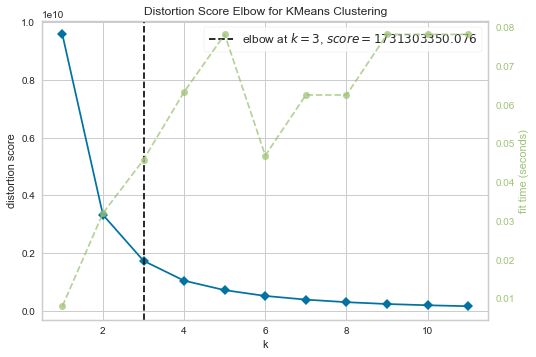

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
# Importing Elbow Visualizer from yellowbrick library and plotting a K Means graph using Elbow Method
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show()

In [120]:
# Thus number of clusters = 4. Initialize using k-means++.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(X)

In [121]:
# Print labels for each data point in the dataset
kmeans.labels_ 

array([0, 0, 0, ..., 3, 2, 0])

In [122]:
# Final inertia value after fitting a KMeans() by using kmeans.inertia_
'''Inertia is calculated by measuring the distance between each data point and its centroid, squaring this distance, 
    and summing these squares across one cluster. A good model is one with low inertia & a low number of clusters (k).
'''
kmeans.inertia_

1042223216.6249839

In [123]:
# Iterations
kmeans.n_iter_

24

In [124]:
# Cluster centers for each cluster
kmeans.cluster_centers_

array([[3416.59686888,   56.3072407 ],
       [7983.1758794 ,   28.05025126],
       [1879.28363988,   63.25072604],
       [5289.27065026,   41.01230228]])

In [125]:
# Getting the size of the clusters 
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 1024, 3: 565, 2: 1035, 1: 199})

## Hence, its verified that the number of Clusters to be choosen will be 4 according to the elbow method.

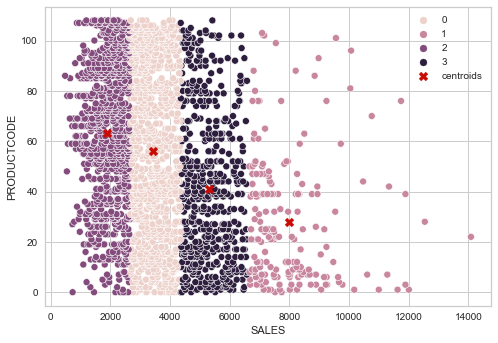

In [126]:
sns.scatterplot(data=X, x="SALES", y="PRODUCTCODE", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()